<a href="https://colab.research.google.com/github/rochactivo-UPC/dynLAB/blob/main/DinP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dinàmica – Práctica 2 – Desarrollo de un índice de daño


---


**Objetivos:**
* A partir de un conjunto de experimentos de
caída libre e impacto, determinar la probabilidad de diferentes tipos de daño.
* Entender la existencia de factores aleatorios en las condiciones iniciales y las peculiaridades irrepetibles los especímenes  usados en la caída libre.
* Entender la noción de regresión logística y su importancia para construir un índice de daño que prediga la probabilidad de ciertos escenarios de daño.

**Tarea a realizar:**
Considerar un conjunto de experimentos de caída libre y una evaluación de los daños sufridos por el espécimen, clasificar los daños y evaluar la probabilidad de cada tipo de daño en función de una variable mecánica pertinente.
   
Descripción de los pasos a realizar:


1.   Obtención de los datos en Excel, recuento de los tipos de daños de cada tipo.
La caída se hizo con una máquina especial que no le da velocidad inicial al huevo y lo deja caer a distintas alturas sobre una superficie de suelo flotante (parquet).
2. Elección de un índice mecánico adecuado (altura, energía, velocidad, aceleración, etc).
3. Construcción de una tabla de datos “índice mecánico” frente a “probabilidad de daño”.
4. Ínice mecánico o índice de daño
5. Realizar una regresión logística, vía Excel u otro software equivalente.
6. Presentar las gráficas para cada tipo de daño y discutirlas brevemente.


---



## Un poco de input teórico:
La figura muestra dos familias de datos de rotura de clavículas (el accidente más típico en competiciones de motociclismo). Los triángulos azules representan cargas de rotura de clavículas reales bajo compresión a baja velocidad, los círculos rojos por compresión a alta velocidad.

Obviamente no parece existir una relación determinante entre $F$ y la ocurrencia de rotura, aunque se observa que en el caso dinámico el promedio de rotura es algo mayor.

La idea básica es estimar la probabilidad como función de la fuerza:
$$P_F = \phi(F)$$

Una forma matemáticamente conveniente para la función $\phi(F)$  es la curva logística, que es una elección muy común en el desarrollo de curvas de riesgo, que viene dada por:
$$P_F = \frac{1}{1 + \exp(\alpha F + \beta)}$$

Donde los coeficientes $\alpha$ y $\beta$ se tiene que obtener mediante regresión. Esta forma funcional se puede arreglar un poco para convertirla en una expresión lineal:
$$\ln\left(\frac{1 - P_F}{P_F}\right) = -\alpha F + \beta \quad (*)$$

Si consideramos la sucesión de cargas de fallo $F_1, F_2, \ldots, F_n $ podemos construir esta tabla:

\begin{array}{|c|c|c|}
\hline
Carga & Probabilidad\,acumulada\, (P_F) & Probit: \ln\left[\frac{1-P_F}{P_F}\right]\\
\hline
 F_1  &  1/n &   \ln(n-1) \\
 F_2  &  2/n  &  \ln\left[\frac{n-2}{2}\right]/2  \\
\ldots & \ldots & \ldots \\
 F_{n-1}  &  (n-1)/n  &  \ln\left[\frac{1}{n-1}\right]  \\
 F_n  &  n/n  &  -  \\
\hline
\end{array}

Ahora se puede hacer una regresión lineal simple entre la columna Probit (Y: variable dependiente) y la columna Carga (X: variable independiente). Así Excel u otro software nos proporcionará de manera directa $\alpha$  y $\beta$. El siguiente gráfico muestra estas operaciones para los datos de clavículas mostrados:


A partir de los valores de $\alpha$ y $\beta$ pueden construirse sin dificultad las densidades de probabilidad (el primer gráfico de la página 2 da las curvas de riesgo que no son otra cosa que la función de distribución de probabilidad acumulada)


## Importar librerias necesarias

In [1]:
# Importar Librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## Descarga los datos

In [2]:
# Asegúrate de haber subido el archivo a tu entorno de Colab primero
file_path = 'eggDrop.csv' # si se carga desde el entorno
df = pd.read_csv(file_path, sep='\t', header=0, names=['Specimen', 'Country', 'Drop_Height', 'EIS1','EIS2','EIS3'])

In [7]:
df

,Specimen,Country,Drop_Height,EIS1,EIS2,EIS3
0,1,ESP,26,0,0,0
1,3,ESP,30,0,0,0
2,4,ESP,30,0,0,0
3,2,ESP,36,1,0,0
4,5,US,36,0,0,0
5,6,ESP,36,0,0,0
6,7,ESP,41,0,0,0
7,8,ESP,41,1,1,0
8,9,ESP,51,0,0,0
9,10,ESP,51,1,1,0


## Cálculo de la probabilidad para cada evento

In [8]:
# Calcular la probabilidad acumulada para cada evento EIS

df['Prob_Acum_EIS1'] = df['EIS1'].cumsum() / len(df)
df['Prob_Acum_EIS2'] = df['EIS2'].cumsum() / len(df)
df['Prob_Acum_EIS3'] = df['EIS3'].cumsum() / len(df)

In [9]:
df

,Specimen,Country,Drop_Height,EIS1,EIS2,EIS3,Prob_Acum_EIS1,Prob_Acum_EIS2,Prob_Acum_EIS3
0,1,ESP,26,0,0,0,0.000000,0.000000,0.000000
1,3,ESP,30,0,0,0,0.000000,0.000000,0.000000
2,4,ESP,30,0,0,0,0.000000,0.000000,0.000000
3,2,ESP,36,1,0,0,0.037037,0.000000,0.000000
4,5,US,36,0,0,0,0.037037,0.000000,0.000000
5,6,ESP,36,0,0,0,0.037037,0.000000,0.000000
6,7,ESP,41,0,0,0,0.037037,0.000000,0.000000
7,8,ESP,41,1,1,0,0.074074,0.037037,0.000000
8,9,ESP,51,0,0,0,0.074074,0.037037,0.000000
9,10,ESP,51,1,1,0,0.111111,0.074074,0.000000


## Calcular Probits

In [10]:
df['Probit_EIS1'] = np.log((1 - df['Prob_Acum_EIS1']) / df['Prob_Acum_EIS1'])
df['Probit_EIS2'] = np.log((1 - df['Prob_Acum_EIS2']) / df['Prob_Acum_EIS2'])
df['Probit_EIS3'] = np.log((1 - df['Prob_Acum_EIS3']) / df['Prob_Acum_EIS3'])

In [12]:
df

,Specimen,Country,Drop_Height,EIS1,EIS2,EIS3,Prob_Acum_EIS1,Prob_Acum_EIS2,Prob_Acum_EIS3,Probit_EIS1,Probit_EIS2,Probit_EIS3
0,1,ESP,26,0,0,0,0.000000,0.000000,0.000000,inf,inf,inf
1,3,ESP,30,0,0,0,0.000000,0.000000,0.000000,inf,inf,inf
2,4,ESP,30,0,0,0,0.000000,0.000000,0.000000,inf,inf,inf
3,2,ESP,36,1,0,0,0.037037,0.000000,0.000000,3.258097,inf,inf
4,5,US,36,0,0,0,0.037037,0.000000,0.000000,3.258097,inf,inf
5,6,ESP,36,0,0,0,0.037037,0.000000,0.000000,3.258097,inf,inf
6,7,ESP,41,0,0,0,0.037037,0.000000,0.000000,3.258097,inf,inf
7,8,ESP,41,1,1,0,0.074074,0.037037,0.000000,2.525729,3.258097,inf
8,9,ESP,51,0,0,0,0.074074,0.037037,0.000000,2.525729,3.258097,inf
9,10,ESP,51,1,1,0,0.111111,0.074074,0.000000,2.079442,2.525729,inf


## Ordenar datos y limpiarlos para realizar las regresiones lieales

In [13]:
new_df = df.copy()
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazar infinitos con NaN
new_df.dropna(subset=['Probit_EIS1'], inplace=True) # Eliminar filas con NaN de 'Probit_EIS1'


In [14]:
new_df

,Specimen,Country,Drop_Height,EIS1,EIS2,EIS3,Prob_Acum_EIS1,Prob_Acum_EIS2,Prob_Acum_EIS3,Probit_EIS1,Probit_EIS2,Probit_EIS3
3,2,ESP,36,1,0,0,0.037037,0.000000,0.000000,3.258097,NaN,NaN
4,5,US,36,0,0,0,0.037037,0.000000,0.000000,3.258097,NaN,NaN
5,6,ESP,36,0,0,0,0.037037,0.000000,0.000000,3.258097,NaN,NaN
6,7,ESP,41,0,0,0,0.037037,0.000000,0.000000,3.258097,NaN,NaN
7,8,ESP,41,1,1,0,0.074074,0.037037,0.000000,2.525729,3.258097,NaN
8,9,ESP,51,0,0,0,0.074074,0.037037,0.000000,2.525729,3.258097,NaN
9,10,ESP,51,1,1,0,0.111111,0.074074,0.000000,2.079442,2.525729,NaN
10,11,ESP,60,1,0,0,0.148148,0.074074,0.000000,1.749200,2.525729,NaN
11,12,ESP,70,0,0,0,0.148148,0.074074,0.000000,1.749200,2.525729,NaN
12,13,ESP,71,0,0,0,0.148148,0.074074,0.000000,1.749200,2.525729,NaN


## Regresiones lineales

  Resultados de la regresión para: EIS1
  Pendiente: -0.038935087568437714
  Intersección: 4.509838094720395
  R^2: 0.9548554409405198



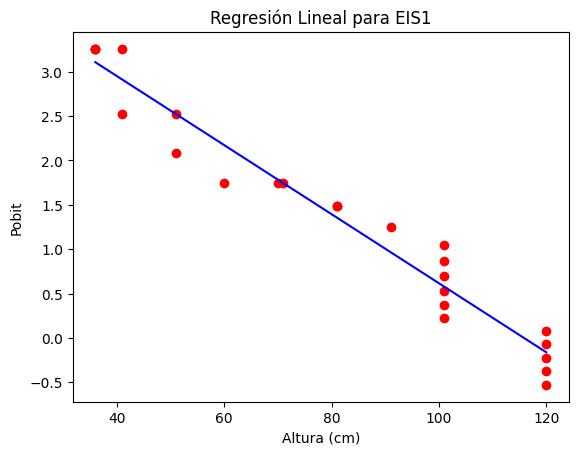

In [17]:
# Realizar regresiones lineales
# Asumiendo que X es el predictor (reemplaza 'X' con la columna de predictor real de tu conjunto de datos)
# También asumiendo que 'X' ya está en tu dataframe y es la variable independiente para la regresión (altura)
X = new_df[['Drop_Height']].values  # Debe ser en forma de array 2D

# Diccionario para guardar los resultados de las regresiones lineales
regression_results = {}

y = new_df['Probit_EIS1'].values  # Variable dependiente para la regresión
model = LinearRegression()
model.fit(X, y)

# Guardar coeficiente, intercepción y score R^2 para cada EIS
alfa = model.coef_[0]
beta = model.intercept_
R_2 = model.score(X, y)

# Imprimir los resultados de la regresión
print(f'  Resultados de la regresión para: EIS1')
print(f"  Pendiente: {alfa}")
print(f"  Intersección: {beta}")
print(f"  R^2: {R_2}\n")

    # Visualización (opcional)
plt.scatter(X, y, color='red')         # Datos originales
plt.plot(X, model.predict(X), color='blue')  # Línea de regresión
plt.xlabel('Altura (cm)')
plt.ylabel('Pobit')
plt.title('Regresión Lineal para EIS1')
plt.show()

## Generación de curvas de fragilidad

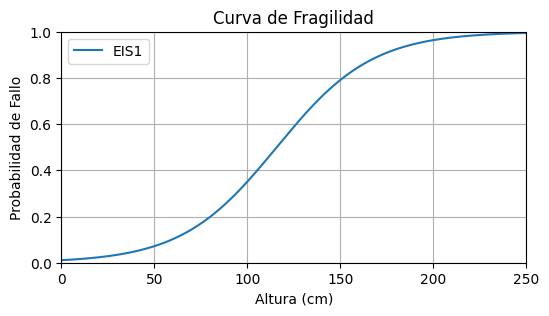

In [19]:
# Generar las curvas de fragilidad para una altura de caída de 0 a 250cm, cada cm
# Generar valores de para la predicción de la curva de fragilidad
X_test = np.linspace(0, 250, 250)

# Calcular la probabilidad de fallo para cada valor de altura
y_pred = 1/(1+np.exp(alfa*X_test+beta))

# Graficar la curva de fragilidad
plt.figure(figsize=(6, 3))
plt.plot(X_test, y_pred, label='EIS1')
plt.xlabel('Altura (cm)')
plt.ylabel('Probabilidad de Fallo')
plt.title('Curva de Fragilidad')
plt.xlim([0,250])
plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.show()